
<p style ="text-align:center">
    <img src="http://epecora.com.br/DataFiles/PPGOLD_logo.png" width="300" alt="PPGOLD Data Science: INTRO"  />
</p>

# Aula 02 de Data Science

# Análise Descritiva
Tempo estimado: **60** minutos


## Objetivos

Após completar essa aula você será capaz de :
* Desenvolver uma tabela de frequências

* Calcular medidas de tendência central: 
    * Média
    * Moda
    * Mediana  
    * Medidas Separatrizes
    * Box Plot

* Calcular medidas de dispersão
    * Desvio padrão
    * Variância 
    * Coeficiente de variação

* Desenvolver Gráficos:
    * Variáveis Qualitativas
        * Barras
        * Pizza
    * Variáveis Quantitativas
        * Colunas
        * Scatter
        * Linha

* Analisar Correlações
    

## Obtenção dos dados
* Vamos usar um arquivo que já sofreu um pré processamento dos dados.

In [35]:
import pandas as pd

In [36]:
caminho = "" # o objeto ainda está vazio. 

caminho = "https://raw.githubusercontent.com/EduPekUfpr/PPGOLD7037/dev/Data/MeuAutoLimpo.csv" 

df = pd.read_csv(caminho) 

In [37]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,164,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


## Tabela de Frequências

* Vamos escolher uma variável que contenha apena valores qualitativos
* Nesse caso eu escolhi a `Make`.
* Primeiro vou passar apenas essa variável para um objeto chamado `df_make`

In [38]:
df_make= df['make'].to_frame()
df_make

,make
0,alfa-romero
1,alfa-romero
2,alfa-romero
3,audi
4,audi
...,...
196,volvo
197,volvo
198,volvo
199,volvo


* Agora vamos criar um novo dataframe com a frequência simples dos valores

In [39]:
df_make_freq = pd.DataFrame({'freq':df_make['make'].value_counts()})
df_make_freq


,freq
toyota,32
nissan,18
mazda,17
mitsubishi,13
honda,13
subaru,12
volkswagen,11
peugot,11
volvo,10
mercedes-benz,8


* Vamos adicionar ao novo dataframe a frequência acumulada

In [40]:
df_make_freq['freq ac'] = df_make_freq.cumsum()
df_make_freq

,freq,freq ac
toyota,32,32
nissan,18,50
mazda,17,67
mitsubishi,13,80
honda,13,93
subaru,12,105
volkswagen,11,116
peugot,11,127
volvo,10,137
mercedes-benz,8,145


* Agora adicionaremos uma nova frequência porém relativa

In [41]:
df_make_freq['freq rel'] = df_make_freq['freq'] / df_make_freq['freq'].sum()
df_make_freq

,freq,freq ac,freq rel
toyota,32,32,0.159204
nissan,18,50,0.089552
mazda,17,67,0.084577
mitsubishi,13,80,0.064677
honda,13,93,0.064677
subaru,12,105,0.059701
volkswagen,11,116,0.054726
peugot,11,127,0.054726
volvo,10,137,0.049751
mercedes-benz,8,145,0.039801


* Por fim para terminar a criação da nossa tabela de frequências vamos adicionar a frequência relativa acumulada

In [42]:
df_make_freq['freq rel ac'] = df_make_freq['freq rel'].cumsum()
df_make_freq

,freq,freq ac,freq rel,freq rel ac
toyota,32,32,0.159204,0.159204
nissan,18,50,0.089552,0.248756
mazda,17,67,0.084577,0.333333
mitsubishi,13,80,0.064677,0.398010
honda,13,93,0.064677,0.462687
subaru,12,105,0.059701,0.522388
volkswagen,11,116,0.054726,0.577114
peugot,11,127,0.054726,0.631841
volvo,10,137,0.049751,0.681592
mercedes-benz,8,145,0.039801,0.721393


## Medidas de Tendência Central

* Para o cálculo das medidas de tendência central vamos escolher uma variável quantitativa.
* Vamos escolher a variável `price`.

* Calculando a média

In [68]:
media = df['price'].mean()
print('- Média da variável price: {:.2f}'.format(media))

- Média da variável price: 13207.13


* Encontrando as modas

In [69]:
moda = df['price'].mode()
moda

0      5572.0
1      6229.0
2      6692.0
3      7295.0
4      7609.0
5      7775.0
6      7898.0
7      7957.0
8      8495.0
9      8845.0
10     8921.0
11     9279.0
12    13499.0
13    16500.0
14    18150.0
dtype: float64

* Encontrando a mediana

In [73]:
mediana = df['price'].median()
print('- Mediana da variável price: {:.2f}'.format(mediana))

- Mediana da variável price: 10295.00


* Encontrando os quartis

In [83]:
Q1 = df['price'].quantile(0.25)
print('- Primeiro Quartil da variável price: {:.2f}'.format(Q1))

Q2 = df['price'].quantile(0.5)
print('- Segundo Quartil da variável price: {:.2f}'.format(Q2))

Q3 = df['price'].quantile(0.75)
print('- Terceiro Quartil da variável price: {:.2f}'.format(Q3))

- Primeiro Quartil da variável price: 7775.00
- Segundo Quartil da variável price: 10295.00
- Terceiro Quartil da variável price: 16500.00


* Gráfico de box plot 

<AxesSubplot: >

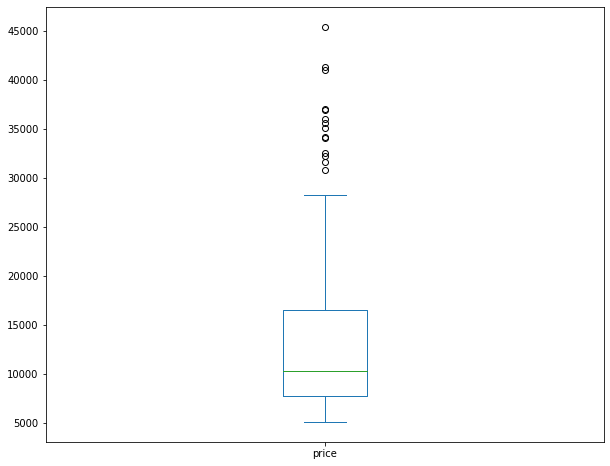

In [86]:
df['price'].plot(kind='box',figsize=(10,8))

## Medidas de Dispersão

- Segundo Quartil da variável price: 10295.00
